#### 라이브러리와 app 데이터 세트 로딩

In [1]:
import numpy as np
import pandas as pd
import gc
import time
import matplotlib.pyplot as plt
import seaborn as sns
#import warning
%matplotlib inline

#warning.ignorewarning(...)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [3]:
app_train = pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')

In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
# test가 121개로 한 개 적은 이유는 타겟이 빠져서임
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

#### TARGET 값 분포 및 AMT_INCOME_TOTAL 값 Histogram
* TARGET값 별 분포도, Pandas, Matplotlib, Seaborn으로 histogram 표현

In [8]:
app_train['TARGET'].value_counts()/app_train.shape[0]

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

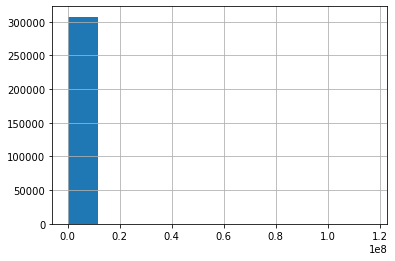

In [9]:
app_train['AMT_INCOME_TOTAL'].hist()

(array([3.07508e+05, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([2.56500000e+04, 1.17230850e+07, 2.34205200e+07, 3.51179550e+07,
        4.68153900e+07, 5.85128250e+07, 7.02102600e+07, 8.19076950e+07,
        9.36051300e+07, 1.05302565e+08, 1.17000000e+08]),
 <a list of 10 Patch objects>)

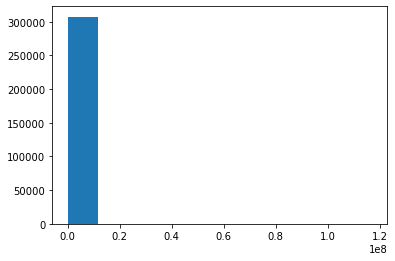

In [10]:
plt.hist(app_train['AMT_INCOME_TOTAL'])

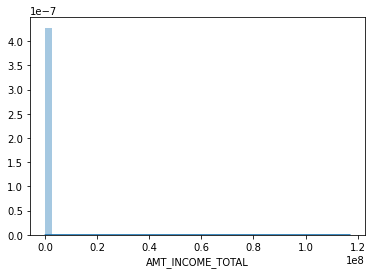

In [11]:
sns.distplot(app_train['AMT_INCOME_TOTAL'])

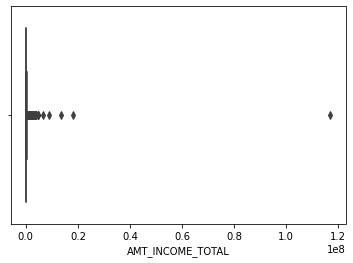

In [12]:
# 4분위를 보여준다.
sns.boxplot(app_train['AMT_INCOME_TOTAL'])

#### AMT_INCOME_TOTAL이 1000000 이하인 값에 대한 분포도 
* boolean indexing으로 filtering 후 histogram 표현

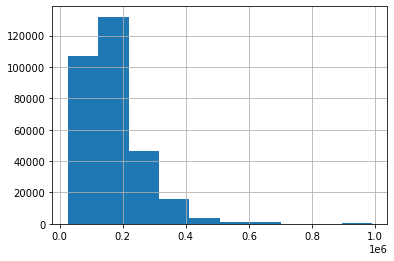

In [13]:
cond_1 = app_train['AMT_INCOME_TOTAL'] < 1000000
app_train[cond_1]['AMT_INCOME_TOTAL'].hist()

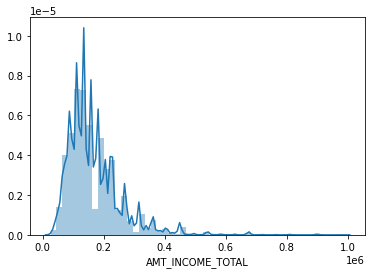

In [14]:
# 이산형을 연속형으로 적용해줌(KDE)
sns.distplot(app_train[cond_1]['AMT_INCOME_TOTAL'])

#### TARGET 값에 따른 AMT_INCOME_TOTAL값 분포도 비교
* distplot과 violinplot 시각화
* plt.subplots() 기반으로 seaborn의 distplot과 violinplot으로 분포도 비교 시각화

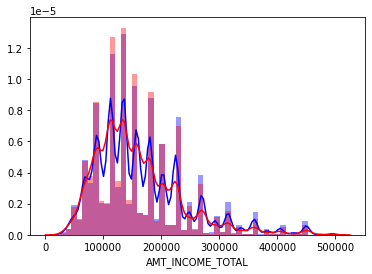

In [15]:
cond1 = (app_train['TARGET'] == 1)
cond0 = (app_train['TARGET'] == 0)
cond_amt = (app_train['AMT_INCOME_TOTAL'] < 500000)

# 만약 kde를 보고싶지 않으면 아래 코드에 kde=False를 추가해주면 된다.
sns.distplot(app_train[cond0 & cond_amt]['AMT_INCOME_TOTAL'], label='0', color='blue')
sns.distplot(app_train[cond1 & cond_amt]['AMT_INCOME_TOTAL'], label='1', color='red')

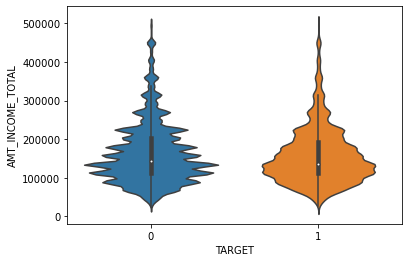

In [16]:
sns.violinplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_train[cond_amt])

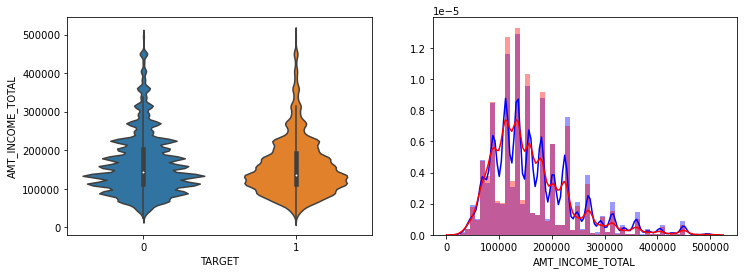

In [21]:
cond1 = (app_train['TARGET'] == 1)
cond0 = (app_train['TARGET'] == 0)
cond_amt = (app_train['AMT_INCOME_TOTAL'] < 500000)


fig, ax = plt.subplots(figsize=(12, 4), nrows=1, ncols=2, squeeze=False)

sns.violinplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_train[cond_amt], ax=ax[0][0])
sns.distplot(app_train[cond0 & cond_amt]['AMT_INCOME_TOTAL'], label='0', color='blue', ax=ax[0][1])
sns.distplot(app_train[cond1 & cond_amt]['AMT_INCOME_TOTAL'], label='1', color='red', ax=ax[0][1])

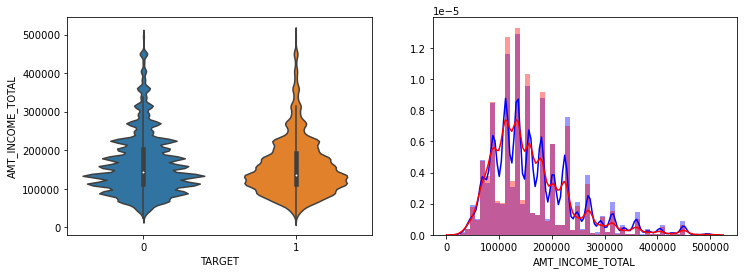

In [22]:
# 함수로 만들기
def show_column_hist_by_target(df, column, is_amt=False):
    
    cond0 = (df['TARGET'] == 0)
    cond1 = (df['TARGET'] == 1)
    
    fig, ax = plt.subplots(figsize=(12, 4), nrows=1, ncols=2, squeeze=False)
    # is_amt 가 True면 < 500000 조건으로 필터링
    cond_amt = True
    if is_amt:
        cond_amt = df[column] < 500000
    
    sns.violinplot(x='TARGET', y=column, data=df[cond_amt], ax=ax[0][0])
    sns.distplot(df[cond0 & cond_amt][column], ax=ax[0][1], label='0', color='blue')
    sns.distplot(df[cond1 & cond_amt][column], ax=ax[0][1], label='1', color='red')

show_column_hist_by_target(app_train, 'AMT_INCOME_TOTAL', is_amt=True)

#### app_train과 app_test를 합쳐서 한번에 데이터 preprocessing 수행. 

In [23]:
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

In [25]:
apps = pd.concat([app_train, app_test])
apps.shape

<ipython-input-25-9057c95a1292>:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  apps = pd.concat([app_train, app_test])


(356255, 122)

In [26]:
apps['TARGET'].value_counts(dropna=False)

0.0    282686
NaN     48744
1.0     24825
Name: TARGET, dtype: int64

#### Object feature들을 Label Encoding
* pandas의 factorize()를 이용  

[Label Encoding에 대한 설명](https://velog.io/@fiifa92/데이터-전처리)

In [27]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 122 entries, AMT_ANNUITY to YEARS_BUILD_MODE
dtypes: float64(66), int64(40), object(16)
memory usage: 334.3+ MB


In [32]:
object_columns = apps.dtypes[apps.dtypes == 'object'].index.tolist()

In [36]:
apps['CODE_GENDER'] = pd.factorize(apps['CODE_GENDER'])[0]

In [39]:
# Label Encoding으로 인해 object가 16개에서 15개로 줄었다.
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 122 entries, AMT_ANNUITY to YEARS_BUILD_MODE
dtypes: float64(66), int64(56)
memory usage: 344.3 MB


In [38]:
object_columns = apps.dtypes[apps.dtypes == 'object'].index.tolist()

for column in object_columns:
    apps[column] = pd.factorize(apps[column])[0]

#### Null값 일괄 변환

In [40]:
apps.isnull().sum().head(100)

AMT_ANNUITY                        36
AMT_CREDIT                          0
AMT_GOODS_PRICE                   278
AMT_INCOME_TOTAL                    0
AMT_REQ_CREDIT_BUREAU_DAY       47568
AMT_REQ_CREDIT_BUREAU_HOUR      47568
AMT_REQ_CREDIT_BUREAU_MON       47568
AMT_REQ_CREDIT_BUREAU_QRT       47568
AMT_REQ_CREDIT_BUREAU_WEEK      47568
AMT_REQ_CREDIT_BUREAU_YEAR      47568
APARTMENTS_AVG                 179948
APARTMENTS_MEDI                179948
APARTMENTS_MODE                179948
BASEMENTAREA_AVG               207584
BASEMENTAREA_MEDI              207584
BASEMENTAREA_MODE              207584
CNT_CHILDREN                        0
CNT_FAM_MEMBERS                     2
CODE_GENDER                         0
COMMONAREA_AVG                 248360
COMMONAREA_MEDI                248360
COMMONAREA_MODE                248360
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_ID_PUBLISH                     0
DAYS_LAST_PHONE_CHANGE              1
DAYS_REGISTR

In [41]:
# -999로 모든 컬럼들의 Null값 변환
apps = apps.fillna(-999)

In [42]:
apps.isnull().sum().head(100)

AMT_ANNUITY                    0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
AMT_INCOME_TOTAL               0
AMT_REQ_CREDIT_BUREAU_DAY      0
AMT_REQ_CREDIT_BUREAU_HOUR     0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_REQ_CREDIT_BUREAU_QRT      0
AMT_REQ_CREDIT_BUREAU_WEEK     0
AMT_REQ_CREDIT_BUREAU_YEAR     0
APARTMENTS_AVG                 0
APARTMENTS_MEDI                0
APARTMENTS_MODE                0
BASEMENTAREA_AVG               0
BASEMENTAREA_MEDI              0
BASEMENTAREA_MODE              0
CNT_CHILDREN                   0
CNT_FAM_MEMBERS                0
CODE_GENDER                    0
COMMONAREA_AVG                 0
COMMONAREA_MEDI                0
COMMONAREA_MODE                0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_ID_PUBLISH                0
DAYS_LAST_PHONE_CHANGE         0
DAYS_REGISTRATION              0
DEF_30_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
ELEVATORS_AVG                  0
ELEVATORS_

#### 학습 데이터와 테스트 데이터 다시 분리

In [43]:
app_train = apps[apps['TARGET'] != -999]
app_test = apps[apps['TARGET'] == -999]
app_train.shape, app_test.shape

((307511, 122), (48744, 122))

In [44]:
app_test = app_test.drop('TARGET', axis=1, inplace=False)
app_test.shape

(48744, 121)

#### 학습 데이터를 검증 데이터로 분리하고 LGBM Classifier로 학습 수행. 
* 피처용 데이터와 타겟 데이터 분리
* 학습용/검증용 데이터 세트 분리

In [45]:
ftr_app = app_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
target_app = app_train['TARGET']

In [47]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=2020)
train_x.shape, valid_x.shape

((215257, 120), (92254, 120))

In [48]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
        n_jobs=-1,
        n_estimators=1000,
        learning_rate=0.02,
        num_leaves=32,
        subsample=0.8,
        max_depth=12,
        silent=-1,
        verbose=-1
        )

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
eval_metric= 'auc', verbose= 100, early_stopping_rounds= 50)


Training until validation scores don't improve for 50 rounds
[100]	training's auc: 0.752205	training's binary_logloss: 0.250372	valid_1's auc: 0.744317	valid_1's binary_logloss: 0.251593
[200]	training's auc: 0.771473	training's binary_logloss: 0.243554	valid_1's auc: 0.754053	valid_1's binary_logloss: 0.247539
[300]	training's auc: 0.784885	training's binary_logloss: 0.239292	valid_1's auc: 0.757737	valid_1's binary_logloss: 0.246203
[400]	training's auc: 0.796336	training's binary_logloss: 0.235948	valid_1's auc: 0.758946	valid_1's binary_logloss: 0.245732
[500]	training's auc: 0.806016	training's binary_logloss: 0.233017	valid_1's auc: 0.759411	valid_1's binary_logloss: 0.24555
Early stopping, best iteration is:
[532]	training's auc: 0.808934	training's binary_logloss: 0.232125	valid_1's auc: 0.759552	valid_1's binary_logloss: 0.245493


LGBMClassifier(learning_rate=0.02, max_depth=12, n_estimators=1000,
               num_leaves=32, silent=-1, subsample=0.8, verbose=-1)

##### Feature importance 시각화 

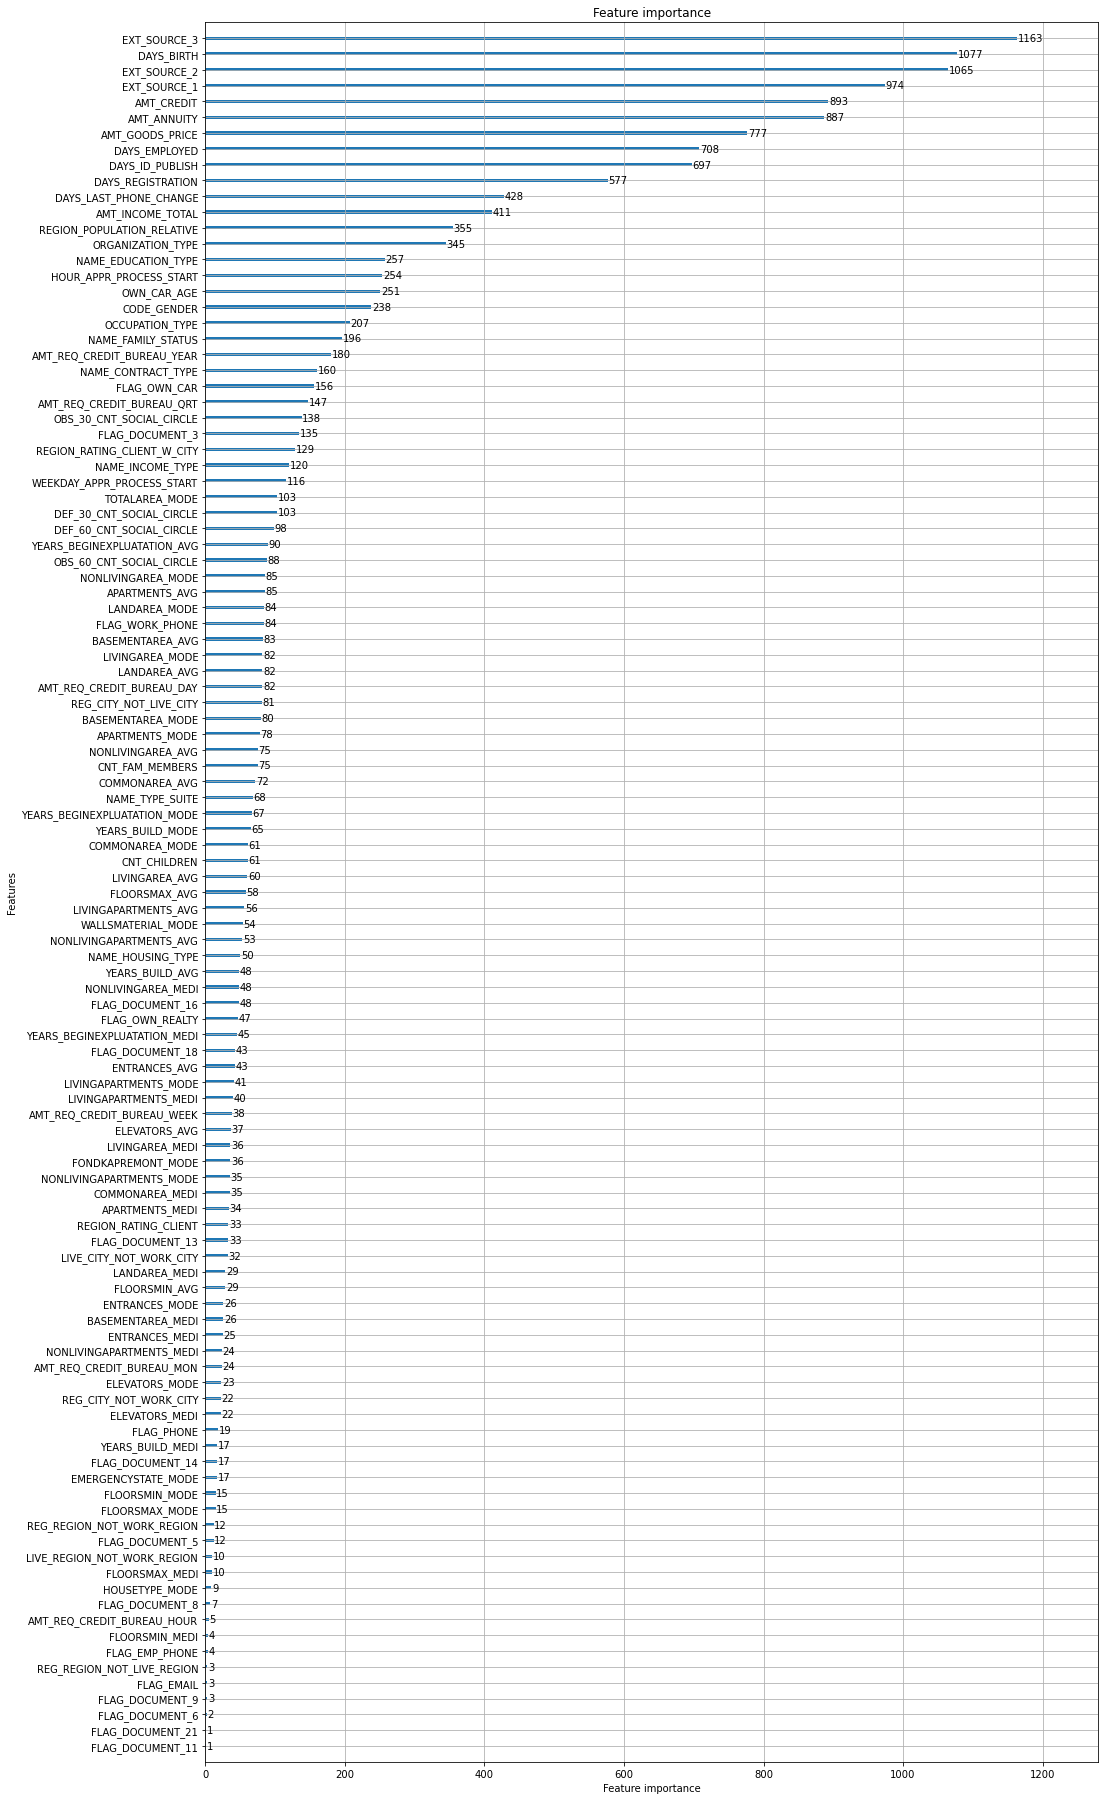

In [49]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(16, 32))

#### 학습된 Classifier를 이용하여 테스트 데이터을 예측하고 결과를 Kaggle로 Submit 수행. 

In [51]:
clf.predict_proba(app_test.drop(['SK_ID_CURR'], axis=1))

array([[0.97246502, 0.02753498],
       [0.87904013, 0.12095987],
       [0.98381082, 0.01618918],
       ...,
       [0.96802646, 0.03197354],
       [0.94283805, 0.05716195],
       [0.82020099, 0.17979901]])

In [52]:
pred = clf.predict_proba(app_test.drop(['SK_ID_CURR'], axis=1))[:, 1]

In [53]:
app_test['TARGET'] = pred
app_test['TARGET'].head()

0    0.027535
1    0.120960
2    0.016189
3    0.037421
4    0.146077
Name: TARGET, dtype: float64

In [56]:
app_test[['SK_ID_CURR', 'TARGET']].to_csv('app_baseline_01.csv', index=False)
```
Private score: 0.74088
Public score: 0.74448
```

SyntaxError: invalid syntax (<ipython-input-56-8c2c8a3a29f3>, line 2)

In [55]:
!ls

HomeCredit_columns_description.csv
OOF_All_01.ipynb
OOF_All_02.ipynb
POS_CASH_balance.csv
Pandas_Groupby_01.ipynb
Pandas_Join_01.ipynb
app_baseline_01.csv
app_baseline_01.ipynb
app_baseline_01_exercise.ipynb
app_baseline_02.ipynb
app_baseline_02_exercise.ipynb
application_test.csv
application_train.csv
bureau.csv
bureau_balance.csv
bureau_baseline_01.ipynb
credit_card_balance.csv
hyper_param_tuning_01.ipynb
hyper_param_tuning_01_exercise.ipynb
installments_payments.csv
pos_installment_creditcard_baseline_01.ipynb
pos_installment_creditcard_baseline_02.ipynb
prev_baseline_01.ipynb
prev_baseline_01_exercise.ipynb
previous_application.csv
sample_submission.csv
